# Library

In [ ]:
import pandas as pd
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC


# Load Dataset

In [ ]:
data = pd.read_csv('Dataset.csv')

In [ ]:
data.head(2000)

,Date,Username,Tweet Content,label
0,2022-12-11 16:37:38+00:00,buddumz,@data168 I think it will take tesla another fu...,0
1,2022-12-11 15:42:47+00:00,JustinArnett22,@artofrune @Icaryx69 @gabbie_tesla @elonmusk B...,2
2,2022-12-11 14:48:37+00:00,tsr0009,@elonmusk starting to think you should resign ...,1
3,2022-12-11 14:42:45+00:00,fricker_eric,@averygrrl Not that it matters but my opinion ...,2
4,2022-12-11 14:22:49+00:00,jgmiddlet,@MattWallace888 I had a much higher opinion of...,2
...,...,...,...,...
1995,2022-05-26 08:49:12+00:00,Abreu1Jmd,@CMacColl I don’t know if this helps but in We...,1
1996,2022-05-26 07:30:06+00:00,PolliePolice,@TurnbullMalcolm @AlboMP @M_McCormackMP @Scott...,2
1997,2022-05-26 06:21:45+00:00,Hrushik42082501,@Shrustappen33 @aegon1009 Who can forget his d...,0
1998,2022-05-26 03:33:00+00:00,austgeog,Revisit 'Fire and cyclone damage to woody vege...,1


In [ ]:
data.dtypes

Date             object
Username         object
Tweet Content    object
label             int64
dtype: object

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(data['Tweet Content'], data['label'], test_size=0.2, random_state=42)

In [ ]:
#check if there is any missing data

missing_data = data.isnull().sum()
print(f"Missing Data: {missing_data}")

#cause there is no missing data we dont need to drop any data from dataset

Missing Data: Date             0
Username         0
Tweet Content    0
label            0
dtype: int64


In [ ]:
#cleaned data from @,link,..
import re

def clean_tweet(tweet):
    # Remove @usernames
    tweet = re.sub(r'@[A-Za-z0-9_]+', '', tweet)

    # Remove URLs
    tweet = re.sub(r'http\S+', '', tweet)

    # Remove special characters and punctuation marks
    tweet = re.sub(r'[^a-zA-Z0-9\s]', '', tweet)

    return tweet

data['cleaned_tweet'] = data['Tweet Content'].apply(clean_tweet)

data.head(2000)

,Date,Username,Tweet Content,label,cleaned_tweet
0,2022-12-11 16:37:38+00:00,buddumz,@data168 I think it will take tesla another fu...,0,I think it will take tesla another full year ...
1,2022-12-11 15:42:47+00:00,JustinArnett22,@artofrune @Icaryx69 @gabbie_tesla @elonmusk B...,2,But they arent a publisher so why would th...
2,2022-12-11 14:48:37+00:00,tsr0009,@elonmusk starting to think you should resign ...,1,starting to think you should resign from Tesl...
3,2022-12-11 14:42:45+00:00,fricker_eric,@averygrrl Not that it matters but my opinion ...,2,Not that it matters but my opinion of him has...
4,2022-12-11 14:22:49+00:00,jgmiddlet,@MattWallace888 I had a much higher opinion of...,2,I had a much higher opinion of him and his co...
...,...,...,...,...,...
1995,2022-05-26 08:49:12+00:00,Abreu1Jmd,@CMacColl I don’t know if this helps but in We...,1,I dont know if this helps but in Western Aust...
1996,2022-05-26 07:30:06+00:00,PolliePolice,@TurnbullMalcolm @AlboMP @M_McCormackMP @Scott...,2,Still waiting for an apology\n\nYou ow...
1997,2022-05-26 06:21:45+00:00,Hrushik42082501,@Shrustappen33 @aegon1009 Who can forget his d...,0,Who can forget his donation to bushfire in A...
1998,2022-05-26 03:33:00+00:00,austgeog,Revisit 'Fire and cyclone damage to woody vege...,1,Revisit Fire and cyclone damage to woody veget...


In [ ]:
#clear duplicate data

data.drop_duplicates(subset=['cleaned_tweet'], inplace=True)
data.to_csv('data.csv', index=False)
data.head(3000)

,Date,Username,Tweet Content,label,cleaned_tweet
0,2022-12-11 16:37:38+00:00,buddumz,@data168 I think it will take tesla another fu...,0,I think it will take tesla another full year ...
1,2022-12-11 15:42:47+00:00,JustinArnett22,@artofrune @Icaryx69 @gabbie_tesla @elonmusk B...,2,But they arent a publisher so why would th...
2,2022-12-11 14:48:37+00:00,tsr0009,@elonmusk starting to think you should resign ...,1,starting to think you should resign from Tesl...
3,2022-12-11 14:42:45+00:00,fricker_eric,@averygrrl Not that it matters but my opinion ...,2,Not that it matters but my opinion of him has...
4,2022-12-11 14:22:49+00:00,jgmiddlet,@MattWallace888 I had a much higher opinion of...,2,I had a much higher opinion of him and his co...
...,...,...,...,...,...
1995,2022-05-26 08:49:12+00:00,Abreu1Jmd,@CMacColl I don’t know if this helps but in We...,1,I dont know if this helps but in Western Aust...
1996,2022-05-26 07:30:06+00:00,PolliePolice,@TurnbullMalcolm @AlboMP @M_McCormackMP @Scott...,2,Still waiting for an apology\n\nYou ow...
1997,2022-05-26 06:21:45+00:00,Hrushik42082501,@Shrustappen33 @aegon1009 Who can forget his d...,0,Who can forget his donation to bushfire in A...
1998,2022-05-26 03:33:00+00:00,austgeog,Revisit 'Fire and cyclone damage to woody vege...,1,Revisit Fire and cyclone damage to woody veget...


In [ ]:
data['cleaned_tweet'] = data['cleaned_tweet'].str.lower()

data.head(3000)

,Date,Username,Tweet Content,label,cleaned_tweet
0,2022-12-11 16:37:38+00:00,buddumz,@data168 I think it will take tesla another fu...,0,i think it will take tesla another full year ...
1,2022-12-11 15:42:47+00:00,JustinArnett22,@artofrune @Icaryx69 @gabbie_tesla @elonmusk B...,2,but they arent a publisher so why would th...
2,2022-12-11 14:48:37+00:00,tsr0009,@elonmusk starting to think you should resign ...,1,starting to think you should resign from tesl...
3,2022-12-11 14:42:45+00:00,fricker_eric,@averygrrl Not that it matters but my opinion ...,2,not that it matters but my opinion of him has...
4,2022-12-11 14:22:49+00:00,jgmiddlet,@MattWallace888 I had a much higher opinion of...,2,i had a much higher opinion of him and his co...
...,...,...,...,...,...
1995,2022-05-26 08:49:12+00:00,Abreu1Jmd,@CMacColl I don’t know if this helps but in We...,1,i dont know if this helps but in western aust...
1996,2022-05-26 07:30:06+00:00,PolliePolice,@TurnbullMalcolm @AlboMP @M_McCormackMP @Scott...,2,still waiting for an apology\n\nyou ow...
1997,2022-05-26 06:21:45+00:00,Hrushik42082501,@Shrustappen33 @aegon1009 Who can forget his d...,0,who can forget his donation to bushfire in a...
1998,2022-05-26 03:33:00+00:00,austgeog,Revisit 'Fire and cyclone damage to woody vege...,1,revisit fire and cyclone damage to woody veget...


# Tokenization

In [ ]:
#import spacy

# Load the English language model
#nlp = spacy.load("en_core_web_sm")

# Tokenize Tweet Content
#clean_data['tokenized_text'] = clean_data['Tweet Content'].apply(lambda x: [token.text for token in nlp(x)])

#clean_data.head()

In [ ]:
#using nltk library

nltk.download('punkt')

data['tokenized_text'] = data['cleaned_tweet'].apply(lambda x: word_tokenize(x))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
data.head(3000)

,Date,Username,Tweet Content,label,cleaned_tweet,tokenized_text
0,2022-12-11 16:37:38+00:00,buddumz,@data168 I think it will take tesla another fu...,0,i think it will take tesla another full year ...,"[i, think, it, will, take, tesla, another, ful..."
1,2022-12-11 15:42:47+00:00,JustinArnett22,@artofrune @Icaryx69 @gabbie_tesla @elonmusk B...,2,but they arent a publisher so why would th...,"[but, they, arent, a, publisher, so, why, woul..."
2,2022-12-11 14:48:37+00:00,tsr0009,@elonmusk starting to think you should resign ...,1,starting to think you should resign from tesl...,"[starting, to, think, you, should, resign, fro..."
3,2022-12-11 14:42:45+00:00,fricker_eric,@averygrrl Not that it matters but my opinion ...,2,not that it matters but my opinion of him has...,"[not, that, it, matters, but, my, opinion, of,..."
4,2022-12-11 14:22:49+00:00,jgmiddlet,@MattWallace888 I had a much higher opinion of...,2,i had a much higher opinion of him and his co...,"[i, had, a, much, higher, opinion, of, him, an..."
...,...,...,...,...,...,...
1995,2022-05-26 08:49:12+00:00,Abreu1Jmd,@CMacColl I don’t know if this helps but in We...,1,i dont know if this helps but in western aust...,"[i, dont, know, if, this, helps, but, in, west..."
1996,2022-05-26 07:30:06+00:00,PolliePolice,@TurnbullMalcolm @AlboMP @M_McCormackMP @Scott...,2,still waiting for an apology\n\nyou ow...,"[still, waiting, for, an, apology, you, owe, a..."
1997,2022-05-26 06:21:45+00:00,Hrushik42082501,@Shrustappen33 @aegon1009 Who can forget his d...,0,who can forget his donation to bushfire in a...,"[who, can, forget, his, donation, to, bushfire..."
1998,2022-05-26 03:33:00+00:00,austgeog,Revisit 'Fire and cyclone damage to woody vege...,1,revisit fire and cyclone damage to woody veget...,"[revisit, fire, and, cyclone, damage, to, wood..."


# Stop word

In [ ]:
#clean from to ,the ,is ,...

nltk.download('stopwords')

# Set of English stopwords
stop_words = set(stopwords.words('english'))

# Apply stop words removal on 'tokenized_text' column
data['filtered_text'] =data['tokenized_text'].apply(lambda tokens: [token for token in tokens if token not in stop_words])
data.head(3000)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Date,Username,Tweet Content,label,cleaned_tweet,tokenized_text,filtered_text
0,2022-12-11 16:37:38+00:00,buddumz,@data168 I think it will take tesla another fu...,0,i think it will take tesla another full year ...,"[i, think, it, will, take, tesla, another, ful...","[think, take, tesla, another, full, year, see,..."
1,2022-12-11 15:42:47+00:00,JustinArnett22,@artofrune @Icaryx69 @gabbie_tesla @elonmusk B...,2,but they arent a publisher so why would th...,"[but, they, arent, a, publisher, so, why, woul...","[arent, publisher, would, treated, publisher, ..."
2,2022-12-11 14:48:37+00:00,tsr0009,@elonmusk starting to think you should resign ...,1,starting to think you should resign from tesl...,"[starting, to, think, you, should, resign, fro...","[starting, think, resign, tesla, agree, many, ..."
3,2022-12-11 14:42:45+00:00,fricker_eric,@averygrrl Not that it matters but my opinion ...,2,not that it matters but my opinion of him has...,"[not, that, it, matters, but, my, opinion, of,...","[matters, opinion, gone, much, think, started,..."
4,2022-12-11 14:22:49+00:00,jgmiddlet,@MattWallace888 I had a much higher opinion of...,2,i had a much higher opinion of him and his co...,"[i, had, a, much, higher, opinion, of, him, an...","[much, higher, opinion, companies, took, twitt..."
...,...,...,...,...,...,...,...
1995,2022-05-26 08:49:12+00:00,Abreu1Jmd,@CMacColl I don’t know if this helps but in We...,1,i dont know if this helps but in western aust...,"[i, dont, know, if, this, helps, but, in, west...","[dont, know, helps, western, australia, couple..."
1996,2022-05-26 07:30:06+00:00,PolliePolice,@TurnbullMalcolm @AlboMP @M_McCormackMP @Scott...,2,still waiting for an apology\n\nyou ow...,"[still, waiting, for, an, apology, you, owe, a...","[still, waiting, apology, owe, australia, apol..."
1997,2022-05-26 06:21:45+00:00,Hrushik42082501,@Shrustappen33 @aegon1009 Who can forget his d...,0,who can forget his donation to bushfire in a...,"[who, can, forget, his, donation, to, bushfire...","[forget, donation, bushfire, australia]"
1998,2022-05-26 03:33:00+00:00,austgeog,Revisit 'Fire and cyclone damage to woody vege...,1,revisit fire and cyclone damage to woody veget...,"[revisit, fire, and, cyclone, damage, to, wood...","[revisit, fire, cyclone, damage, woody, vegeta..."


# Stemming

In [ ]:

stemmer = PorterStemmer()

# Define a function to stem a text
def stem_text(text):
    if isinstance(text, list):
        stemmed_words = [stemmer.stem(word) for word in text]
        return ' '.join(stemmed_words)
    else:
        words = text.split()
        stemmed_words = [stemmer.stem(word) for word in words]
        return ' '.join(stemmed_words)

#applying stem text functoin on filtered data
data['stemmed_text'] = data['filtered_text'].apply(stem_text)


# lemmatizing

In [ ]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

# Initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Define a function to lemmatize text
def lemmatize_text(text):
    if isinstance(text, list):
        lemmatized_words = [lemmatizer.lemmatize(word) for word in text]
        return ' '.join(lemmatized_words)
    else:
        words = text.split()
        lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
        return ' '.join(lemmatized_words)

# Applying lemmatize text function on filtered data
data['lemmatized_text'] = data['filtered_text'].apply(lemmatize_text)

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
data.head(3000)

,Date,Username,Tweet Content,label,cleaned_tweet,tokenized_text,filtered_text,stemmed_text,lemmatized_text
0,2022-12-11 16:37:38+00:00,buddumz,@data168 I think it will take tesla another fu...,0,i think it will take tesla another full year ...,"[i, think, it, will, take, tesla, another, ful...","[think, take, tesla, another, full, year, see,...",think take tesla anoth full year see massiv ga...,think take tesla another full year see massive...
1,2022-12-11 15:42:47+00:00,JustinArnett22,@artofrune @Icaryx69 @gabbie_tesla @elonmusk B...,2,but they arent a publisher so why would th...,"[but, they, arent, a, publisher, so, why, woul...","[arent, publisher, would, treated, publisher, ...",arent publish would treat publish that conveni...,arent publisher would treated publisher thats ...
2,2022-12-11 14:48:37+00:00,tsr0009,@elonmusk starting to think you should resign ...,1,starting to think you should resign from tesl...,"[starting, to, think, you, should, resign, fro...","[starting, think, resign, tesla, agree, many, ...",start think resign tesla agre mani opinion you...,starting think resign tesla agree many opinion...
3,2022-12-11 14:42:45+00:00,fricker_eric,@averygrrl Not that it matters but my opinion ...,2,not that it matters but my opinion of him has...,"[not, that, it, matters, but, my, opinion, of,...","[matters, opinion, gone, much, think, started,...",matter opinion gone much think start doge coin...,matter opinion gone much think started doge co...
4,2022-12-11 14:22:49+00:00,jgmiddlet,@MattWallace888 I had a much higher opinion of...,2,i had a much higher opinion of him and his co...,"[i, had, a, much, higher, opinion, of, him, an...","[much, higher, opinion, companies, took, twitt...",much higher opinion compani took twitter made ...,much higher opinion company took twitter made ...
...,...,...,...,...,...,...,...,...,...
1995,2022-05-26 08:49:12+00:00,Abreu1Jmd,@CMacColl I don’t know if this helps but in We...,1,i dont know if this helps but in western aust...,"[i, dont, know, if, this, helps, but, in, west...","[dont, know, helps, western, australia, couple...",dont know help western australia coupl year ag...,dont know help western australia couple year a...
1996,2022-05-26 07:30:06+00:00,PolliePolice,@TurnbullMalcolm @AlboMP @M_McCormackMP @Scott...,2,still waiting for an apology\n\nyou ow...,"[still, waiting, for, an, apology, you, owe, a...","[still, waiting, apology, owe, australia, apol...",still wait apolog owe australia apolog ignor p...,still waiting apology owe australia apology ig...
1997,2022-05-26 06:21:45+00:00,Hrushik42082501,@Shrustappen33 @aegon1009 Who can forget his d...,0,who can forget his donation to bushfire in a...,"[who, can, forget, his, donation, to, bushfire...","[forget, donation, bushfire, australia]",forget donat bushfir australia,forget donation bushfire australia
1998,2022-05-26 03:33:00+00:00,austgeog,Revisit 'Fire and cyclone damage to woody vege...,1,revisit fire and cyclone damage to woody veget...,"[revisit, fire, and, cyclone, damage, to, wood...","[revisit, fire, cyclone, damage, woody, vegeta...",revisit fire cyclon damag woodi veget north co...,revisit fire cyclone damage woody vegetation n...


In [ ]:
#Splitting data(using stemmed data)
X_train, X_test, y_train, y_test = train_test_split(data['stemmed_text'], data['label'], test_size=0.2 ,random_state = 42)

In [ ]:
#Splitting data(using lemmatized data)
X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(data['lemmatized_text'], data['label'], test_size=0.2,random_state = 42)

# Bag of word representation

In [ ]:

vectorizer = CountVectorizer()

# Fit the vectorizer to the training data and transform the training data into bag of words representation
X_train_bow = vectorizer.fit_transform(X_train)

# Transform the testing data into bag of words representation using the fitted vectorizer
X_test_bow = vectorizer.transform(X_test)


In [ ]:
#for lemmatized data
vectorizer = CountVectorizer()

# Fit the vectorizer to the training data and transform the training data into bag of words representation
X_train_bow_l = vectorizer.fit_transform(X_train_l)

# Transform the testing data into bag of words representation using the fitted vectorizer
X_test_bow_l = vectorizer.transform(X_test_l)

# Naive Bayes(bag of word)

In [ ]:
# train Naive Bayes classifier

naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train_bow, y_train)

#predict on test set
predictions = naive_bayes_classifier.predict(X_test_bow)

# Calculate accuracy on test set
accuracy = accuracy_score(y_test, predictions)
print("Accuracy in %:", accuracy * 100)

# Calculate F1 score
f1 = f1_score(y_test, predictions,average='macro')
print("F1 Score in %:", f1*100)


Accuracy in %: 56.33074935400517
F1 Score in %: 52.36260029347052


Confusion Matrix

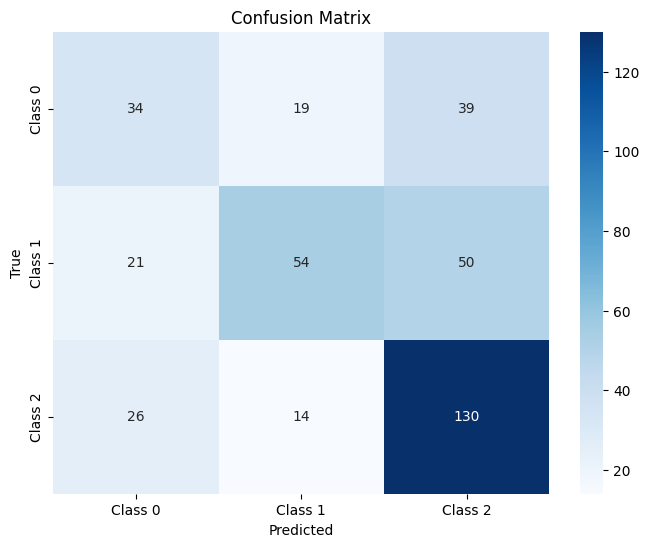

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Create confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#naive bayes(lemmatized)

In [ ]:
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train_bow_l, y_train_l)

#predict on test set
predictions = naive_bayes_classifier.predict(X_test_bow_l)

# Calculate accuracy on test set
accuracy = accuracy_score(y_test, predictions)
print("Accuracy in %:", accuracy * 100)

# Calculate F1 score
f1 = f1_score(y_test, predictions,average='macro')
print("F1 Score in %:", f1*100)

Accuracy in %: 55.297157622739014
F1 Score in %: 49.816499865046445


Confusion matrix

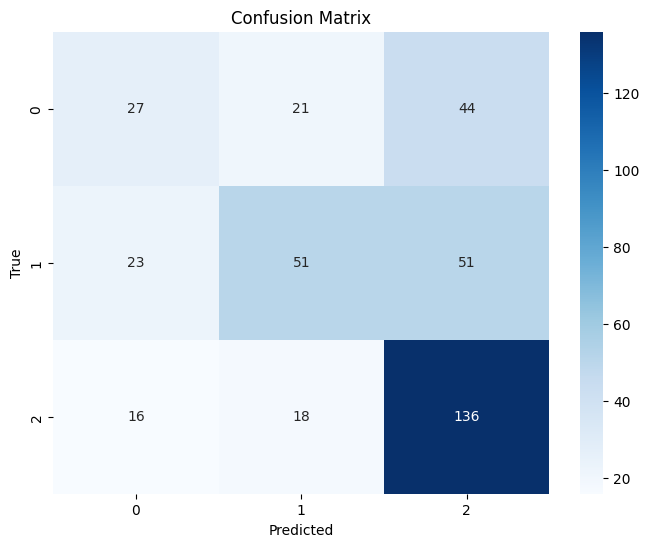

In [ ]:
# Create confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=naive_bayes_classifier.classes_, yticklabels=naive_bayes_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# TF-IDF

In [ ]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

#Naive Bayes(TF_IDF)

In [ ]:
# Train Naive Bayes classifier
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train_tfidf, y_train)

# Predict on the test set
predictions = naive_bayes_classifier.predict(X_test_tfidf)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, predictions)
print("Accuracy in %:", accuracy * 100)

# Calculate F1 score
f1 = f1_score(y_test, predictions, average='macro')
print("F1 Score in %:", f1 * 100)

Accuracy in %: 49.35400516795866
F1 Score in %: 33.222002838335925


Confusion Matrix

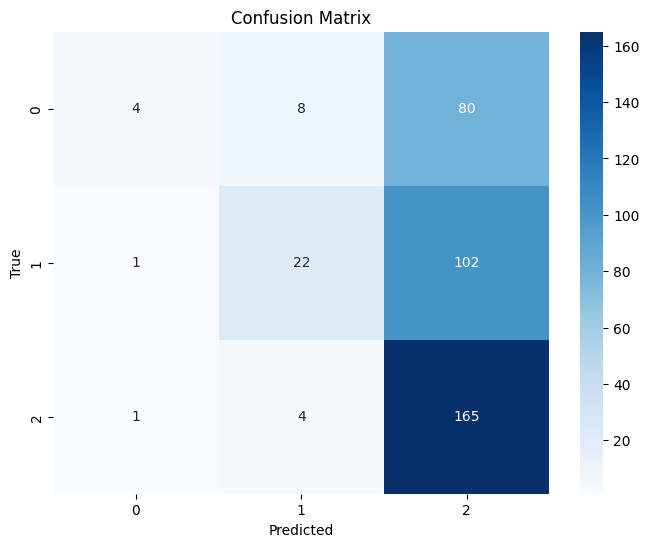

In [ ]:
# Create confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=naive_bayes_classifier.classes_, yticklabels=naive_bayes_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#TF_IDF(lemmatized)


In [ ]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf_l = tfidf_vectorizer.fit_transform(X_train_l)
X_test_tfidf_l = tfidf_vectorizer.transform(X_test_l)

naive bayes(TF_IDF_lemmatized)

In [ ]:
# Train Naive Bayes classifier
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train_tfidf_l, y_train)

# Predict on the test set
predictions = naive_bayes_classifier.predict(X_test_tfidf_l)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, predictions)
print("Accuracy in %:", accuracy * 100)

# Calculate F1 score
f1 = f1_score(y_test, predictions, average='macro')
print("F1 Score in %:", f1 * 100)

Accuracy in %: 49.87080103359173
F1 Score in %: 33.785434945318556


Confusion Matrix

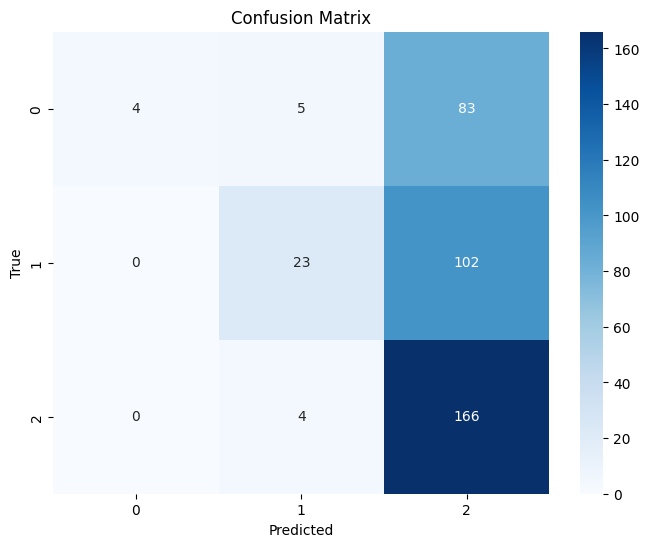

In [ ]:
# Create confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=naive_bayes_classifier.classes_, yticklabels=naive_bayes_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# SVM

In [ ]:
svm_classifier = LinearSVC()
svm_classifier.fit(X_train_tfidf, y_train)

# Predict on the test set
predictions_svm = svm_classifier.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions_svm)
print("Accuracy in %:", accuracy * 100)

#Calculate f1 score
f1 = f1_score(y_test, predictions_svm , average='macro')
print("F1 Score in %:", f1*100)

Accuracy in %: 52.4547803617571
F1 Score in %: 49.44400334032542


confusion matrix

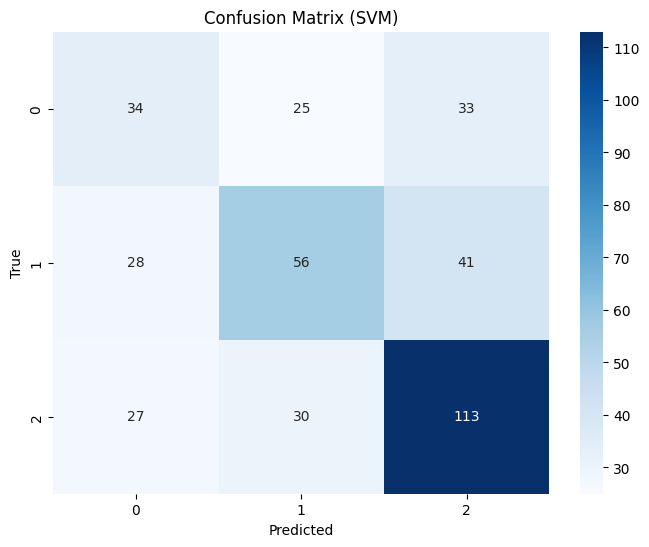

In [ ]:
# Create confusion matrix
conf_matrix_svm = confusion_matrix(y_test, predictions_svm)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues", xticklabels=svm_classifier.classes_, yticklabels=svm_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (SVM)')
plt.show()

#SVM(lemmatized)

In [ ]:
#lemmatized data

svm_classifier = LinearSVC()
svm_classifier.fit(X_train_tfidf_l, y_train_l)

# Predict on the test set
predictions_svm = svm_classifier.predict(X_test_tfidf_l)

# Calculate accuracy
accuracy = accuracy_score(y_test_l, predictions_svm)
print("Accuracy in %:", accuracy * 100)

#Calculate f1 score
f1 = f1_score(y_test_l, predictions_svm , average='macro')
print("F1 Score in %:", f1*100)

Accuracy in %: 53.48837209302325
F1 Score in %: 50.33690495908131


Confusion Matrix

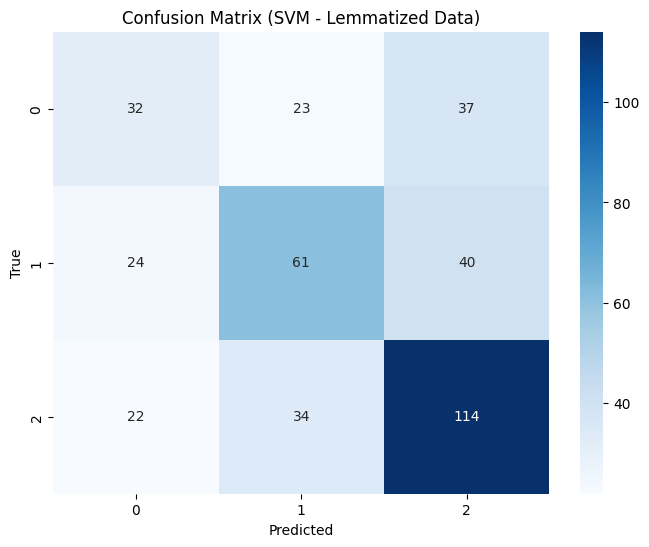

In [ ]:
# Create confusion matrix
conf_matrix_svm = confusion_matrix(y_test_l, predictions_svm)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues", xticklabels=svm_classifier.classes_, yticklabels=svm_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (SVM - Lemmatized Data)')
plt.show()

#Using GridSearch to find the best hyperparameters for poly kernel

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline

# Create a pipeline with CountVectorizer and SVM
svm_pipeline = make_pipeline(CountVectorizer(), SVC(kernel='poly'))

# Define the hyperparameters grid
param_grid = {
    'svc__C': [0.1, 1, 10],
    'svc__degree': [2, 3, 4],
    'svc__coef0': [0, 1],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(svm_pipeline, param_grid,cv=5, scoring='accuracy', verbose=1)

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Evaluate on the test set using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on Test Set: {accuracy * 100}%')


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters: {'svc__C': 10, 'svc__coef0': 0, 'svc__degree': 2}
Accuracy on Test Set: 54.52196382428941%


Confusion Matrix

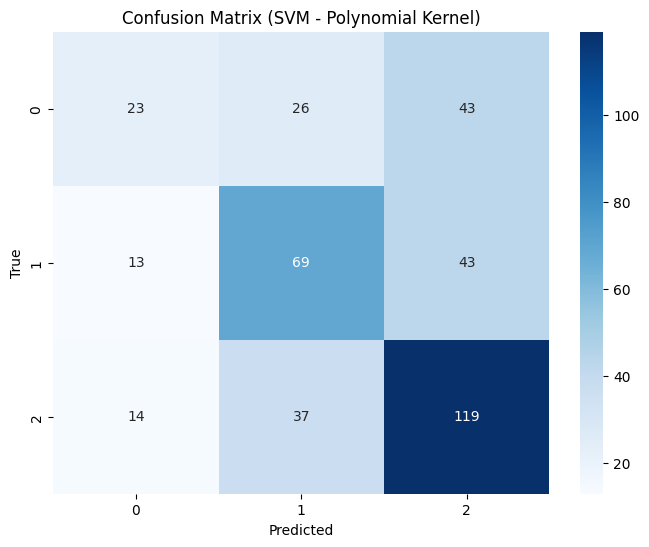

In [ ]:
# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=best_model.named_steps['svc'].classes_, yticklabels=best_model.named_steps['svc'].classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (SVM - Polynomial Kernel)')
plt.show()

#Using GridSearch to find the best hyperparameters for RBF kernel(TF_IDF)

In [ ]:
# Create TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Define the hyperparameters grid
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 1, 'scale', 'auto'],  # 'scale' and 'auto' are options for automatic scaling
}

# Initialize SVM model with RBF kernel
svm_rbf_model = SVC(kernel='rbf')

# Initialize GridSearchCV
grid_search = GridSearchCV(svm_rbf_model, param_grid, cv=5, scoring='accuracy', verbose=1)

# Perform grid search
grid_search.fit(X_train_tfidf, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Evaluate on the test set using the best model
best_model = grid_search.best_estimator_
X_test_tfidf = tfidf_vectorizer.transform(X_test)
y_pred = best_model.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on Test Set: {accuracy * 100}%')

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'C': 10, 'gamma': 1}
Accuracy on Test Set: 53.746770025839794%


Confusion Matrix

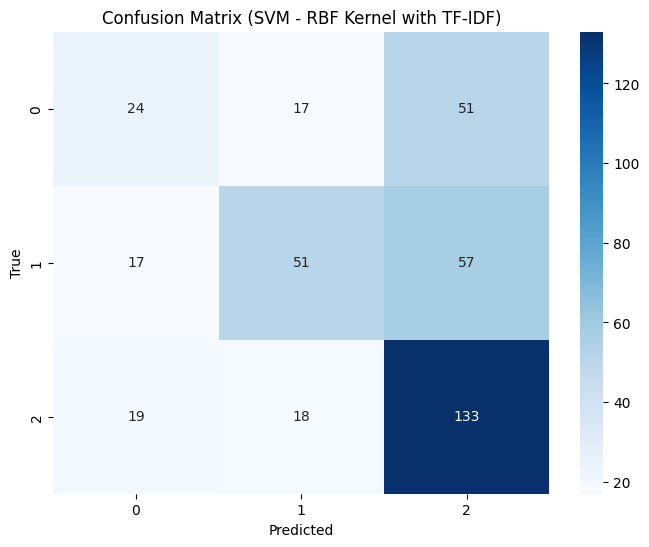

In [ ]:
# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (SVM - RBF Kernel with TF-IDF)')
plt.show()

# Bert

In [ ]:
import torch
from transformers import BertTokenizer, BertModel
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


# Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased').to(device)

# Tokenize and encode the text
data['encoded_text'] = data['cleaned_tweet'].apply(lambda x: tokenizer.encode(x, add_special_tokens=True, return_tensors='pt'))

# Extract BERT embeddings
data['bert_embeddings'] = data['encoded_text'].apply(lambda x: model(**{'input_ids': x})['last_hidden_state'].mean(dim=1).squeeze().detach().numpy())

# Prepare features and labels
X = np.vstack(data['bert_embeddings'])
y = LabelEncoder().fit_transform(data['label'])

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X, y, test_size=0.2, random_state=42)



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

# SVM-BERT

In [ ]:

# Initialize SVM model
svm_model = SVC(kernel='linear', C=1.0)

# Train the model
svm_model.fit(X_train_b, y_train_b)

# Make predictions on the test set
y_pred_b = svm_model.predict(X_test_b)

# Evaluate the model
accuracy = accuracy_score(y_test_b , y_pred_b)
print(f'Accuracy in %: {accuracy*100}')

Accuracy in %: 56.33074935400517


Confusion Matrix

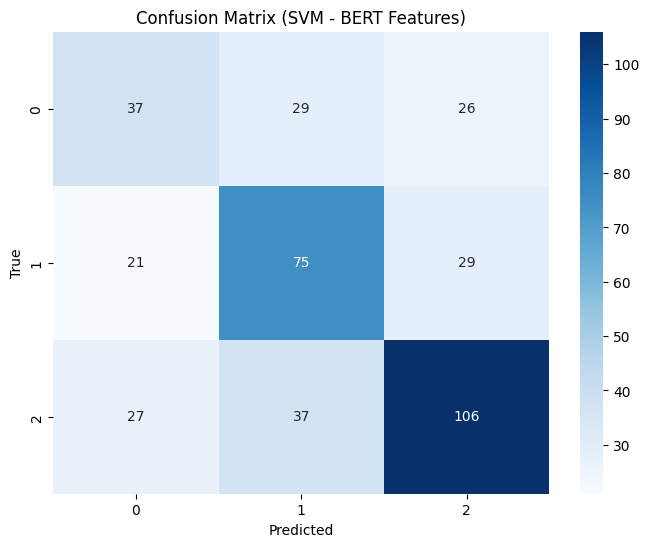

In [ ]:
# Create confusion matrix
conf_matrix_svm = confusion_matrix(y_test_b, y_pred_b)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues", xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (SVM - BERT Features)')
plt.show()

# Naive Bayes - BERT

In [ ]:
from sklearn.naive_bayes import GaussianNB

naive_bayes_model = GaussianNB()

# Train the model
naive_bayes_model.fit(X_train_b , y_train_b)

# Make predictions on the test set
y_pred_n = naive_bayes_model.predict(X_test_b)

# Evaluate the model
accuracy = accuracy_score(y_test_b, y_pred_n)
print(f'Accuracy in %: {accuracy*100}')

Accuracy in %: 48.837209302325576


Confusion Matrix

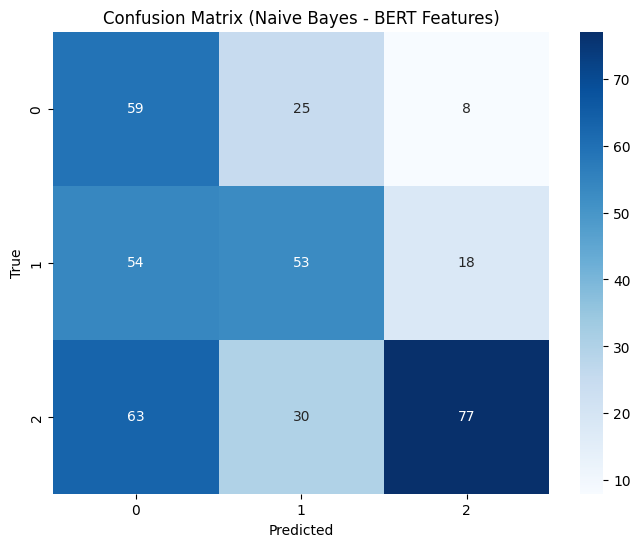

In [ ]:
# Create confusion matrix
conf_matrix_nb = confusion_matrix(y_test_b, y_pred_n)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt="d", cmap="Blues", xticklabels=naive_bayes_model.classes_, yticklabels=naive_bayes_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Naive Bayes - BERT Features)')
plt.show()

#logistic regression-BERT

In [ ]:
# Initialize Logistic Regression model
from sklearn.linear_model import LogisticRegression

logistic_regression_model = LogisticRegression(max_iter=1000)

# Train the model
logistic_regression_model.fit(X_train_b, y_train_b)

# Make predictions on the test set
y_pred_r = logistic_regression_model.predict(X_test_b)

# Evaluate the model
accuracy = accuracy_score(y_test_b, y_pred_r)
print(f'Accuracy in %: {accuracy*100}')

Accuracy in %: 58.139534883720934


Confusion Matrix

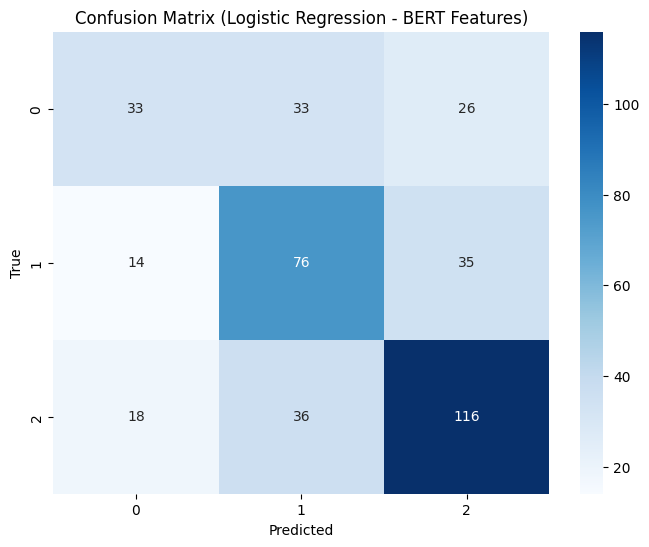

In [ ]:
# Create confusion matrix
conf_matrix_lr = confusion_matrix(y_test_b, y_pred_r)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt="d", cmap="Blues", xticklabels=logistic_regression_model.classes_, yticklabels=logistic_regression_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Logistic Regression - BERT Features)')
plt.show()